In [1]:
import urllib.request
from bs4 import BeautifulSoup as BS
from tqdm import tqdm
import pickle
import pandas as pd
import re
import os
import unidecode
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [2]:
import sys
print(sys.version)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [2]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Create name list

In [113]:
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
headers={'User-Agent':user_agent,}

In [3]:
urls = ['https://www.imdb.com/list/ls058011111/', 'https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page=2', 
       'https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page=3', 'https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page=4',
       'https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page=5', 'https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page=6',
       'https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page=7', 'https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page=8',
       'https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page=9', 'https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page=10']
tempList = []
for x in urls:
    request=urllib.request.Request(x,None,headers) #The assembled request
    response = urllib.request.urlopen(request)
    page = response.read() # The data u need
    soup = BS(page)

    for x in soup.find_all('h3', {'class', 'lister-item-header'}):
        tempList.append(x.find('a').text.strip().lower())

/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [4]:
url = 'https://www.usmagazine.com/celebrities/a/'
request=urllib.request.Request(url,None,headers) #The assembled request
response = urllib.request.urlopen(request)
page = response.read() # The data u need
soup = BS(page)

names = soup.find_all('span', {'class', 'celebrity-name'})
namesList = [x.text.strip() for x in names]

/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [5]:
namesList = [x.lower() for x in namesList]

In [39]:
with open('celebritiesEdit.txt', 'r') as f:
    x = f.readlines()
    
x = [y.rstrip().lower() for y in x]

In [40]:
x.extend(z for z in namesList if z not in x)
x.extend(z for z in tempList if z not in x)

In [41]:
x = [x.replace(' ', '-') for x in x]

In [42]:
len(x)

1917

In [43]:
from tqdm import tqdm

In [45]:
x[0] = 'asap-rocky'

In [46]:
f = open('celebrityNames.txt', 'w')

for word in x:
    f.write("%s\n" % word.strip())

### Retrieve asian celebrities

In [161]:
request=urllib.request.Request('https://en.wikipedia.org/wiki/List_of_Asian_Americans',None,headers) #The assembled request
response = urllib.request.urlopen(request)
page = response.read() # The data u need
soup = BS(page)

asianList = []

for x in soup.find_all('li'):
    name = x.text.split(',')[0].split('–')[0].split('(')[0].split('-')[0].split('Chinese')[0].split('fashion')[0].split('became')[0].strip()
    try:
        if not name[0].isdigit():
            asianList.append('https://healthyceleb.com/' + name.lower().replace(' ', '-') + '-height-weight-body-statistics')
    except:
        continue

/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [162]:
asianList = [unidecode.unidecode(accented_string) for accented_string in asianList]

f = open('asianLinks2.txt', 'w')

for word in asianList:
    f.write("%s\n" % word.strip())

### Check new entries

In [164]:
with open('resultsAsian.txt', 'r') as f:
    asian1 = f.readlines()

with open('resultsAsian2.txt', 'r') as f:
    asian2 = f.readlines()

In [169]:
asian1 = [x.rstrip().replace('http://www.bodymeasurements.org/', '').replace('-', ' ') for x in asian1]
asian2 = [x.rstrip().replace('https://healthyceleb.com/', '').replace('-height-weight-body-statistics', '').replace('-', ' ') for x in asian2]

In [173]:
directs = [d for d in os.listdir('./Flickr')]

In [186]:
asianBody = []
asianHealthy = []
asianBody2 = []

In [187]:
for x in asian1:
    if not x in directs:
        asianBody.append(x)

In [188]:
for x in asian2:
    if not x in directs:
        asianHealthy.append(x)

In [189]:
for x in asianBody:
    if not x in asianHealthy:
        asianBody2.append(x)

In [198]:
asianHealthy

['https://healthyceleb.com/chloe bennet-height-weight-body-statistics',
 'https://healthyceleb.com/nargis fakhri-height-weight-body-statistics',
 'https://healthyceleb.com/janina gavankar-height-weight-body-statistics',
 'https://healthyceleb.com/griffin gluck-height-weight-body-statistics',
 'https://healthyceleb.com/kelly hu-height-weight-body-statistics',
 'https://healthyceleb.com/sung kang-height-weight-body-statistics',
 'https://healthyceleb.com/ken leung-height-weight-body-statistics',
 'https://healthyceleb.com/grace park-height-weight-body-statistics',
 'https://healthyceleb.com/janel parrish-height-weight-body-statistics',
 'https://healthyceleb.com/maggie q-height-weight-body-statistics',
 'https://healthyceleb.com/brenda song-height-weight-body-statistics',
 'https://healthyceleb.com/steven yeun-height-weight-body-statistics',
 'https://healthyceleb.com/enrique iglesias-height-weight-body-statistics',
 'https://healthyceleb.com/norah jones-height-weight-body-statistics',
 

## More celebs

In [250]:
days = []
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
tempList2 = []

for i in range(1,32):
    if i == 1 or i == 21 or i == 31:
        days.append(str(i) + 'st')
    elif i == 2 or i == 22:
        days.append(str(i) + 'nd')
    elif i == 3 or i == 23:
        days.append(str(i) + 'rd')
    else:
        days.append(str(i) + 'th')

for month in months:        
    for day in days:
        url = 'https://www.thefamouspeople.com/'+month+'-'+day+'.php'
        request=urllib.request.Request(url,None,headers) #The assembled request
        try:
            response = urllib.request.urlopen(request)
        except:
            print(url)
            continue
        page = response.read() # The data u need
        soup = BS(page)
        
        for x in soup.find_all('div', {'class', 'tile'}):
            if int(x.find_all('p')[-1].text) > 1970:
                name = x.find('img', alt=True)
                tempList2.append(name['alt'])

/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


https://www.thefamouspeople.com/february-30th.php
https://www.thefamouspeople.com/february-31st.php
https://www.thefamouspeople.com/april-31st.php
https://www.thefamouspeople.com/june-31st.php
https://www.thefamouspeople.com/september-31st.php
https://www.thefamouspeople.com/november-31st.php


In [275]:
tempList = []
tempList2 = [x.lower().rstrip() for x in tempList2]

for x in tempList2:
    if not x in directs:
        tempList.append(x.replace(' ', '-'))

In [276]:
tempList = ['https://healthyceleb.com/' + word + '-height-weight-body-statistics'.replace(' ', '-') for word in tempList]

In [277]:
tempList = [unidecode.unidecode(accented_string) for accented_string in tempList]

In [278]:
f = open('links2.txt', 'w')

for word in tempList:
    f.write("%s\n" % word)

In [279]:
for x in tempList:
    x.encode('ascii')

In [306]:
len(tempList2)

10697

# Healthy Celeb

In [47]:
with open('celebrityNames.txt', 'r') as f:
    x = f.readlines()
    
x = [y.rstrip().lower() for y in x]

In [55]:
x = ['https://healthyceleb.com/' + word + '-height-weight-body-statistics' for word in x]

In [60]:
import unidecode

y = [unidecode.unidecode(accented_string) for accented_string in x]

In [61]:
for word in y:
    try:
        word.encode('ascii')
    except:
        continue

In [75]:
f = open('healthyCeleb.txt', 'w')

for word in y:
    url = word
    f.write("%s\n" % url)

# Create data set from healthy celeb

In [192]:
with open('results.txt', 'r') as f:
    z = f.readlines()
    
z = [y.rstrip().lower() for y in z]

In [281]:
with open('resultsLarge.txt', 'r') as f:
    v = f.readlines()
    
v = [y.rstrip().lower() for y in v]

In [313]:
b = [word.replace('-height-weight-body-statistics', '').replace('https://healthyceleb.com/', '').replace('-', ' ') for word in v]
f = open('nameListLarge.txt', 'w')

for word in b:
    url = word
    f.write("%s\n" % url)

In [316]:
with open('nameListLarge.txt', 'r') as f:
    v = f.readlines()
    
v = [y.rstrip().lower() for y in v]
len(v)

1092

In [323]:
tempList3 = []

for x in v:
    if not x in os.listdir('./Flickr'):
        tempList3.append(x)

In [326]:
def check_dir(text):
    if not os.path.exists('/home/lumpsum/Desktop/Data Science/Scriptie/Flickr/'+text):
        os.makedirs('/home/lumpsum/Desktop/Data Science/Scriptie/Flickr/'+text)

In [321]:
with open('nameListLarge.txt', 'r') as f:
    celebs = f.readlines()

celebs = [x.rstrip() for x in celebs]

In [327]:
for c in tempList3:
    check_dir(c)

In [328]:
f = open('nameListLarge2.txt', 'w')

for word in tempList3:
    f.write("%s\n" % word)
    
f.close()

In [194]:
asianHealthy = ['https://healthyceleb.com/' + word + '-height-weight-body-statistics' for word in asianHealthy]

In [201]:
asianHealthy = [word.replace(' ', '-').strip() for word in asianHealthy]

In [285]:
num = re.compile('\d')

info = {}

for url in tqdm(v):    
    request=urllib.request.Request(url,None,headers) #The assembled request
    response = urllib.request.urlopen(request)
    page = response.read() # The data u need
    soup = BS(page)

    name = url.replace('https://healthyceleb.com/', '').replace('-height-weight-body-statistics', '')

    h, w, b, r, c, e, m = [''] * 7
    for x in soup.find_all('h3'):
        header = x.text.strip()
        try:
            if header == 'Height':
                h = x.nextSibling.text
            elif header == 'Weight':
                w = x.nextSibling.text
            elif header == 'Build':
                b = x.nextSibling.text
            elif header == 'Race / Ethnicity':
                r = x.nextSibling.text
            elif header == 'Hair Color':
                c = x.nextSibling.text
            elif header == 'Eye Color':
                e = x.nextSibling.text
            elif header == 'Measurements':
                nextTag = x
                while True:
                    nextTag = nextTag.nextSibling
                    if nextTag.name == 'p':
                        text = nextTag.text
                        if bool(num.search(text)):
                            m = m + text
                    elif nextTag.name == 'ul':
                        text = nextTag.text
                        if bool(num.search(text)):
                            m = m + text
                    elif nextTag.name == 'div':
                        continue
                    else:
                        break
        except:
            continue

    info[name] = {'Height':h, 'Weight':w, 'Build':b, 'Race':r, 'Hair':c, 'Eye':e, 'Measurements':m}


  0%|          | 0/1092 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))

100%|██████████| 1092/1092 [42:43<00:00,  2.35s/it]


In [286]:
info

{'chrishell-stause': {'Build': 'Slim',
  'Eye': 'Dark Brown',
  'Hair': 'Dark Brown',
  'Height': '5 ft 6 in or 168 cm',
  'Measurements': '36-24-35 in or 91.5-61-89 cm',
  'Race': 'White',
  'Weight': '54 kg or 119 pounds'},
 'kid-ink': {'Build': 'Athletic',
  'Eye': 'Dark Brown',
  'Hair': 'Black',
  'Height': '5 ft 8 in or 173 cm',
  'Measurements': 'Chest – 38 in or 96.5 cmArms / Biceps – 13.5 in or 34.5 cmWaist – 31 in or 79 cm',
  'Race': 'Black',
  'Weight': '67 kg or 148 lbs'},
 'lily-cole': {'Build': 'Slim',
  'Eye': 'Blue',
  'Hair': 'Red',
  'Height': '5 ft 10½ in or 179 cm',
  'Measurements': '34-27-36 in or 86-68.5-91.5 cm',
  'Race': 'White',
  'Weight': '60 kg or 132 lbs'},
 'karan-singh-grover': {'Build': 'Athletic',
  'Eye': 'Light Brown',
  'Hair': 'Black',
  'Height': '5 ft 9Â½ in or 177 cm',
  'Measurements': ' Chest – 46 in or 117 cmArms / Biceps – 16.5 in or 42 cmWaist – 35 in or 89 cm',
  'Race': 'Indian',
  'Weight': '77 kg or 170 pounds'},
 'joa<<l-matip': {'Bu

In [9]:
with open('healthyCelebLarge.pickle', 'wb') as handle:
    pickle.dump(info, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'info' is not defined

In [2]:
with open('./Pickles/healthyCelebData.pickle', 'rb') as handle:
    a = pickle.load(handle)

In [3]:
with open('./Pickles/healthyCelebLarge.pickle', 'rb') as handle:
    b = pickle.load(handle)

EOFError: Ran out of input

In [4]:
with open('./Pickles/healthyCelebDataAsian.pickle', 'rb') as handle:
    c = pickle.load(handle)

In [5]:
healthy = pd.DataFrame.from_dict(a, orient='index')

In [9]:
healthyLarge = pd.DataFrame.from_dict(b, orient='index')

NameError: name 'b' is not defined

In [6]:
healthyAsian = pd.DataFrame.from_dict(c, orient='index')
healthyAsian.Race = healthyAsian.Race.apply(lambda x : 'Asian')

In [7]:
healthyData = pd.concat([healthy, healthyAsian])

In [8]:
healthyData

,Race,Measurements,Eye,Hair,Height,Build,Weight
50-cent,Black,50 Cent’s body specifications may be –,Dark Brown,Black,6 ft or 183 cm,Bodybuilder,94 kg or 207 pounds
aaron-carter,White,Chest – 43 in or 109 cmArms / Biceps – 14 in o...,Light Brown,Blonde,6 ft or 183 cm,Slim,72 kg or 159 pounds
aaron-taylor-johnson,White,Chest – 46 in or 117 cmArms / Biceps – 17 in o...,Blue,Dark Brown,5 ft 11 in or 180 cm,Athletic,82 kg or 181 pounds
abbie-cornish,White,34-26-36 in or 87-66-91.5 cm,Green,Blonde,5 ft 8 in or 173 cm,Slim,59 kg or 130 pounds
abby-lee-miller,White,42-36-40 in or 107-91.5-102 cm,Green,Dark Brown,5 ft 8 in or 173 cm,Large,83 kg or 183 lbs
abigail-breslin,White,37-28-34 in or 94-71-86 cm,Blue,Her natural hair color is ‘Brown’.,5 ft 1 in or 155 cm,Slim,61 kg or 134.5 pounds
adam-brody,White,Chest – 40 in or 101 cmArms / Biceps – 13 in o...,Hazel,Dark Brown,5 ft 11 in or 180 cm,Slim,74 kg or 163 pounds
adam-lambert,White,Chest – 40 in or 102 cmArms / Biceps – 13 in o...,Blue,He has naturally “Strawberry Blonde” hair.,6 ft 1 in or 185 cm,Average,78 kg or 172 pounds
adam-levine,White,,Hazel,Dark Brown,5 ft 11Â¾ or 182 cm,Athletic,77 kg or 170 lbs
adam-sandler,White,,Dark Brown,Black,5 ft 9½ in or 177 cm,Average,86 kg or 190 pounds


In [25]:
len(healthyData.Race.unique()) + len(healthyData.Build.unique()) + len(healthyData.Hair.unique()) + len(healthyData.Eye.unique())

167

In [20]:
len(healthyData.Build.unique())

10

In [21]:
len(healthyData.Hair.unique())

109

In [22]:
len(healthyData.Eye.unique())

28

### Measurements

In [40]:
def extractMeasurements(x):
    try:
        return str(re.findall('(\d+\.?\d+-\d+\.?\d+-\d+.?\d+\s?cm)', x)[0])
    except:
        return x
    
def extractMeasurements2(x):
    c = 'cm'
    try:
        x = [y+c for y in x.split(c) if y]
        for cut in x:
            if 'chest' in cut.lower() and not 'waist' in cut.lower():
                chest = 'Chest: '+ re.findall('(\d+.?\d+)\s?cm', cut)[0]
            elif 'waist' in cut.lower() and not 'chest' in cut.lower():
                waist = 'Waist: '+ re.findall('(\d+.?\d+)\s?cm', cut)[0]
            elif 'bicep' in cut.lower() or 'arm' in cut.lower() and not 'waist' in cut.lower():
                arms = 'Arms: '+ re.findall('(\d+.?\d+)\s?cm', cut)[0]
        if chest is not None and waist is not None and arms is not None:
            return chest + ' ' + waist + ' ' + arms
    except:
        try:
            return x[0]
        except:
            return ''

In [41]:
healthyData.Measurements = healthyData.Measurements.apply(extractMeasurements)
healthyData.Measurements = healthyData.Measurements.apply(lambda x : x.replace('½', '.5'))
healthyData.Measurements = healthyData.Measurements.apply(extractMeasurements2)

50-cent                            None
aaron-carter                       None
aaron-taylor-johnson               None
abbie-cornish                      None
abby-lee-miller                    None
abigail-breslin                    None
adam-brody                         None
adam-lambert                       None
adam-levine                        None
adam-sandler                       None
adele                              None
adrian-grenier                     None
adrianne-palicki                   None
adrienne-bailon                    None
al-pacino                          None
alec-baldwin                       None
alessandra-ambrosio                None
alex-o'loughlin                    None
alex-pettyfer           waist – 32 inch
alexander-ludwig                   None
alexander-skarsgard                None
alexandra-daddario                 None
alexis-bledel                      None
ali-larter                         None
alice-eve                          None


### Weight

In [415]:
def extrachtWeight(x):
    try:
        return float(re.findall('(\d+.?\d+)\s?kg', x)[0])
    except:
        return 0.0

In [416]:
healthyData.Weight = healthyData.Weight.apply(extrachtWeight)

### Height

In [418]:
def extractHeight(x):
    try:
        return float(re.findall('(\d+.?\d+)\s?cm', x)[0])
    except:
        return 0.0

In [419]:
healthyData.Height = healthyData.Height.apply(extractHeight)

### Hair

In [420]:
healthyData.Hair = healthyData.Hair.apply(lambda x : 'Blonde' if 'blonde' in x.lower() or 'blond' in x.lower() else x)
healthyData.Hair = healthyData.Hair.apply(lambda x : 'Brown' if 'brown' in x.lower() or 'brunette' in x.lower() or 'auburn' in x.lower() else x)
healthyData.Hair = healthyData.Hair.apply(lambda x : 'Bald' if 'bald' in x.lower() else x)
healthyData.Hair = healthyData.Hair.apply(lambda x : 'Black' if 'black' in x.lower() else x)
healthyData.Hair = healthyData.Hair.apply(lambda x : 'Red' if 'red' in x.lower() or 'ginger' in x.lower() else x)
healthyData.Hair = healthyData.Hair.apply(lambda x : 'Gray' if 'salt and pepper' in x.lower() or 'grey' in x.lower() or
                                          'white' in x.lower() or 'gray' in x.lower() else x)
healthyData.Hair = healthyData.Hair.apply(lambda x : '' if 'dye' in x.lower() else x)
healthyData.Hair.value_counts()

Brown     935
Blonde    446
Black     383
Red        53
Gray       18
Bald       16
           11
Name: Hair, dtype: int64

### Eye

In [421]:
healthyData.Eye = healthyData.Eye.apply(lambda x : 'Green' if 'green' in x.lower() or 'amber' in x.lower() else x)
healthyData.Eye = healthyData.Eye.apply(lambda x : 'Blue' if 'blue' in x.lower() or 
                                        'she has different colored eyes.' in x.lower() else x)
healthyData.Eye = healthyData.Eye.apply(lambda x : 'Hazel' if 'hazel' in x.lower() else x)
healthyData.Eye = healthyData.Eye.apply(lambda x : 'Brown' if 'brown' in x.lower() else x)
healthyData.Eye = healthyData.Eye.apply(lambda x : 'Green' if 'grey' in x.lower() else x)
healthyData.Eye = healthyData.Eye.apply(lambda x : '' if 'various' in x.lower() or 'unknown' in x.lower() else x)
healthyData.Eye.value_counts()

Brown    809
Blue     514
Green    288
Hazel    171
Black     52
Gray      17
          11
Name: Eye, dtype: int64

### Build

In [422]:
healthyData.Build = healthyData.Build.apply(lambda x : 'Slim' if 'slim' in x.lower() or 'skinny' in x.lower() or 'petite' in x.lower() else x)
healthyData.Build = healthyData.Build.apply(lambda x : 'Athletic' if 'athletic' in x.lower() else x)
healthyData.Build.value_counts()

Slim           895
Athletic       514
Average        289
Voluptuous     100
Large           26
                24
Bodybuilder     14
Name: Build, dtype: int64

### Race

In [423]:
healthyData.Race = healthyData.Race.apply(lambda x : 'Multiracial' if 'multiracial' in x.lower() or 
                                          'mixed' in x.lower() or 'filipino' in x.lower() or 
                                          'italian' in x.lower() or 'multi-ethnic' in x.lower() else x)
healthyData.Race = healthyData.Race.apply(lambda x : 'Indian' if 'punjabi' in x.lower() else x)
healthyData.Race = healthyData.Race.apply(lambda x : 'Asian' if 'asian' in x.lower() else x)
healthyData.Race = healthyData.Race.apply(lambda x : 'Hispanic' if 'hispanic' in x.lower() or 
                                          'latino' in x.lower() or 'latin' in x.lower() or 'tongan' in x.lower() else x)
healthyData.Race = healthyData.Race.apply(lambda x : 'Black' if 'black' in x.lower() or 'luo' in x.lower() else x)
healthyData.Race = healthyData.Race.apply(lambda x : 'White' if 'white' in x.lower() or 'jew' in x.lower() or 
                                          'polish' in x.lower() or 'welsh' in x.lower() or 
                                          'irish' in x.lower() or 'english' in x.lower() else x)
healthyData.Race.value_counts()

White             1246
Multiracial        229
Black              198
                    63
Asian               50
Hispanic            34
Indian              33
Middle Eastern       9
Name: Race, dtype: int64

### BMI

In [424]:
healthyData['BMI'] = healthyData.Weight / (healthyData.Height / 100 * healthyData.Height / 100)

In [438]:
with open('healthyCelebTotal.pickle', 'wb') as handle:
    pickle.dump(healthyData, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
with open('./Pickles/healthyCelebTotal.pickle', 'rb') as handle:
    healthyData = pickle.load(handle)

In [11]:
healthyData.at['50-cent', 'Measurements'] = 'Chest: 124.5 Waist: 87 Arms: 43'

In [13]:
healthyData.shape

(1862, 8)

In [14]:
healthyData['Chest'] = ''
healthyData['Waist'] = ''
healthyData['Arms'] = ''
healthyData['Buste'] = ''
healthyData['Waistline'] = ''
healthyData['Hip'] = ''

In [15]:
healthyData.Chest = healthyData.Measurements.apply(lambda x : re.findall('Chest:\s(\d+.?\d+)', x)[0] if 'chest:' in x.lower() else '')
healthyData.Waist = healthyData.Measurements.apply(lambda x : re.findall('Waist:\s(\d+.?\d+)', x)[0] if 'waist:' in x.lower() else '')
healthyData.Arms = healthyData.Measurements.apply(lambda x : re.findall('Arms:\s(\d+.?\d+)', x)[0] if 'arms:' in x.lower() else '')

In [16]:
healthyData.Buste = healthyData.Measurements.apply(lambda x : re.findall('(\d+.?\d+)', x.split('-')[0])[0] if len(x.split('-')) == 3 else '')
healthyData.Waistline = healthyData.Measurements.apply(lambda x : re.findall('(\d+.?\d+)', x.split('-')[1])[0] if len(x.split('-')) == 3 else '')
healthyData.Hip = healthyData.Measurements.apply(lambda x : re.findall('(\d+.?\d+)', x.split('-')[2])[0] if len(x.split('-')) == 3 else '')

In [17]:
healthyData = healthyData[~healthyData.index.duplicated(keep='first')]

In [12]:
with open('./Pickles/healthyCelebTotalEdited.pickle', 'rb') as handle:
    healthyData = pickle.load(handle)

In [20]:
healthyData.Race.value_counts()

White             1243
Multiracial        229
Black              198
                    63
Asian               38
Hispanic            34
Indian              33
Middle Eastern       9
Name: Race, dtype: int64

In [16]:
healthyData.at['leo-howard', 'Chest'] = '111.76'

In [63]:
healthyData3.Chest = pd.to_numeric(healthyData3.Chest)
healthyData3.Waist = pd.to_numeric(healthyData3.Waist)
healthyData3.Arms = pd.to_numeric(healthyData3.Arms)
healthyData3.Buste = pd.to_numeric(healthyData3.Buste)
healthyData3.Waistline = pd.to_numeric(healthyData3.Waistline)
healthyData3.Hip = pd.to_numeric(healthyData3.Hip)

In [17]:
healthyData..max()

200.0

In [10]:
healthyData[healthyData.Chest == healthyData.Chest.max()]

,Build,Eye,Hair,Height,Measurements,Race,Weight,BMI,Chest,Waist,Arms,Buste,Waistline,Hip
casey-affleck,Average,Blue,Brown,175.0,Chest: 99 Waist: 84 Arms: 33,White,70.0,22.857143,99,84,33,,,
jackson-rathbone,Athletic,Green,Brown,178.0,Chest: 99 Waist: 81 Arms: 35.5,White,73.0,23.040020,99,81,35.5,,,
jason-schwartzman,Average,Hazel,Brown,168.0,Chest: 99 Waist: 84 Arms: 33,White,69.0,24.447279,99,84,33,,,
josh-hartnett,Athletic,Brown,Brown,191.0,Chest: 99 Waist: 86 Arms: 34,White,87.0,23.848030,99,86,34,,,
kevin-bacon,Athletic,Blue,Brown,178.0,Chest: 99 Waist: 84 Arms: 34,White,76.0,23.986870,99,84,34,,,
logan-lerman,Slim,Blue,Black,174.0,Chest: 99 Waist: 84 Arms: 34,White,68.0,22.460034,99,84,34,,,
matthew-bellamy,Slim,Blue,Brown,170.0,Chest: 99 Waist: 91.5 Arms: 33,White,66.0,22.837370,99,91.5,33,,,
miles-teller,Average,Brown,Brown,183.0,Chest: 99 Waist: 86 Arms: 35.5,White,79.0,23.589835,99,86,35.5,,,
patrick-dempsey,Athletic,Green,Brown,179.0,Chest: 99 Waist: 81 Arms: 38,White,77.0,24.031709,99,81,38,,,
tony-parker,Athletic,Black,Black,188.0,Chest: 99 Waist: 86 Arms: 35.5,Multiracial,84.0,23.766410,99,86,35.5,,,


In [11]:
healthyData.BMI = healthyData.BMI.apply(lambda x : None if x == np.inf or x == 0 else x)

In [71]:
healthyData.Height = (healthyData.Height-healthyData.Height.min())/(healthyData.Height.max()-healthyData.Height.min())
healthyData.Weight = (healthyData.Weight-healthyData.Weight.min())/(healthyData.Weight.max()-healthyData.Weight.min())
healthyData.BMI = (healthyData.BMI-healthyData.BMI.min())/(healthyData.BMI.max()-healthyData.BMI.min())
healthyData.Chest = (healthyData.Chest-healthyData.Chest.min())/(healthyData.Chest.max()-healthyData.Chest.min())
healthyData.Waist = (healthyData.Waist-healthyData.Waist.min())/(healthyData.Waist.max()-healthyData.Waist.min())
healthyData.Arms = (healthyData.Arms-healthyData.Arms.min())/(healthyData.Arms.max()-healthyData.Arms.min())
healthyData.Buste = (healthyData.Buste-healthyData.Buste.min())/(healthyData.Buste.max()-healthyData.Buste.min())
healthyData.Waistline = (healthyData.Waistline-healthyData.Waistline.min())/(healthyData.Waistline.max()-healthyData.Waistline.min())
healthyData.Hip = (healthyData.Hip-healthyData.Hip.min())/(healthyData.Hip.max()-healthyData.Hip.min())

In [16]:
with open('./Pickles/healthyCelebTotal.pickle', 'rb') as handle:
    healthyData = pickle.load(handle)

In [18]:
healthyData.BMI

inf

# Evaluate

In [15]:
i = 0

for x in os.listdir('./Flickr'):
    amount = len(os.listdir('./Flickr/' + x))
    i += amount
    
i

799715

In [94]:
len(os.listdir('./Flickr'))

1847

In [126]:
healthyData.Buik.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Body'

### Count faces

In [125]:
for x in os.listdir('./Flickr'):
    os.makedirs('./FilteredFlickr/' + x)

In [4]:
beneath = []

for x in os.listdir('./FilteredFlickr'):
    if (len([x for x in os.listdir('./FilteredFlickr/' + x)])) < 100:
        beneath.append(x)

# Prepare data for model

In [115]:
with open('./Pickles/healthyCelebTotal.pickle', 'rb') as handle:
    healthyData2 = pickle.load(handle)

In [121]:
healthyData2 = healthyData2.drop(['Measurements', 'Build', 'Eye', 'Hair', 'BMI', 'Race'], axis=1)

In [7]:
healthyData = healthyData.replace(r'^\s*$', np.nan, regex=True)

In [8]:
healthyData = healthyData.dropna()

In [122]:
healthyData2

,Height,Weight
50-cent,183.0,94.0
aaron-carter,183.0,72.0
aaron-taylor-johnson,180.0,82.0
abbie-cornish,173.0,59.0
abby-lee-miller,173.0,83.0
abigail-breslin,155.0,61.0
adam-brody,180.0,74.0
adam-lambert,185.0,78.0
adam-levine,182.0,77.0
adam-sandler,177.0,86.0


In [123]:
as_list = healthyData2.index.tolist()
as_list = [x.replace('-', ' ') for x in as_list]
healthyData2.index = as_list

In [126]:
healthyData2.shape

(1862, 2)

In [128]:
names = open("names.txt").readlines()
names = [x.rstrip() for x in names]

for x in set(healthyData2.index.tolist()):
    if x not in names:
        healthyData2 = healthyData2.drop(labels=x)

In [129]:
len(set(healthyData2.index.tolist()))

1366

In [139]:
healthyData['BMI'] = healthyData.Weight / ((healthyData.Height / 100) * (healthyData.Height / 100))

In [141]:
healthyData.Height = (healthyData.Height-healthyData.Height.min())/(healthyData.Height.max()-healthyData.Height.min())
healthyData.Weight = (healthyData.Weight-healthyData.Weight.min())/(healthyData.Weight.max()-healthyData.Weight.min())
healthyData.BMI = (healthyData.BMI-healthyData.BMI.min())/(healthyData.BMI.max()-healthyData.BMI.min())

In [69]:
healthyData.Race.value_counts()

White            953
Multiracial      177
Black            149
Light-Skinned     60
Asian             27
Name: Race, dtype: int64

In [68]:
healthyData.Build = healthyData.Build.apply(lambda x : 'Athletic' if 'bodybuilder' in x.lower() or 'voluptuous' in x.lower() else x)
healthyData.Eye = healthyData.Eye.apply(lambda x : 'Other' if 'Gray' in x.lower() or 'Black' in x.lower() else x)
healthyData.Race = healthyData.Race.apply(lambda x : 'Light-Skinned' if 'hispanic' in x.lower() or 'indian' in x.lower() or 'middle eastern' in x.lower() else x)

In [130]:
healthyData2 = healthyData2.sort_index()

In [131]:
healthyData2

,Height,Weight
2 chainz,194.0,88.0
21 savage,178.0,72.0
50 cent,183.0,94.0
aaron carter,183.0,72.0
aaron taylor johnson,180.0,82.0
aaron taylor johnson,180.0,82.0
abbey clancy,175.0,57.0
abbey lee kershaw,181.0,52.0
abbie cornish,173.0,59.0
abhishek bachchan,188.0,84.0


In [56]:
names = healthyData.index.tolist()

In [70]:
# use pd.concat to join the new columns with your original dataframe
healthyData = pd.concat([healthyData,pd.get_dummies(healthyData['Build'], prefix='build')],axis=1)
healthyData = pd.concat([healthyData,pd.get_dummies(healthyData['Eye'], prefix='eye')],axis=1)
healthyData = pd.concat([healthyData,pd.get_dummies(healthyData['Hair'], prefix='hair')],axis=1)
healthyData = pd.concat([healthyData,pd.get_dummies(healthyData['Race'], prefix='race')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
healthyData.drop(['Build'],axis=1, inplace=True)
healthyData.drop(['Eye'],axis=1, inplace=True)
healthyData.drop(['Hair'],axis=1, inplace=True)
healthyData.drop(['Race'],axis=1, inplace=True)

In [3]:
with open('./Pickles/healthyVGG19Final.pickle', 'rb') as handle:
    healthyData = pickle.load(handle)

In [4]:
healthyData.shape

(1366, 24)

In [7]:
healthyData.loc['alec baldwin']

Height                0.592593
Weight                0.522727
BMI                   0.310038
build_Athletic        0.000000
build_Average         1.000000
build_Large           0.000000
build_Slim            0.000000
eye_Black             0.000000
eye_Blue              1.000000
eye_Brown             0.000000
eye_Gray              0.000000
eye_Green             0.000000
eye_Hazel             0.000000
hair_Bald             0.000000
hair_Black            0.000000
hair_Blonde           0.000000
hair_Brown            0.000000
hair_Gray             1.000000
hair_Red              0.000000
race_Asian            0.000000
race_Black            0.000000
race_Light-Skinned    0.000000
race_Multiracial      0.000000
race_White            1.000000
Name: alec baldwin, dtype: float64

In [8]:
healthyData.loc['abbie cornish']

Height                0.469136
Weight                0.170455
BMI                   0.109902
build_Athletic        0.000000
build_Average         0.000000
build_Large           0.000000
build_Slim            1.000000
eye_Black             0.000000
eye_Blue              0.000000
eye_Brown             0.000000
eye_Gray              0.000000
eye_Green             1.000000
eye_Hazel             0.000000
hair_Bald             0.000000
hair_Black            0.000000
hair_Blonde           1.000000
hair_Brown            0.000000
hair_Gray             0.000000
hair_Red              0.000000
race_Asian            0.000000
race_Black            0.000000
race_Light-Skinned    0.000000
race_Multiracial      0.000000
race_White            1.000000
Name: abbie cornish, dtype: float64

In [72]:
for column in healthyData:
    if "race_" in column:
        print(column, (healthyData[column] == 1).sum())

race_Asian 27
race_Black 149
race_Light-Skinned 60
race_Multiracial 177
race_White 953


In [37]:
len([column for column in healthyData.columns if column != "Height" and column != "Weight" and column != "BMI"])

21

In [8]:
ids = [x for x in os.listdir('./BodyCropFinal/')]

In [85]:
labels = {}

for x in tqdm(ids):
    y = x.replace('.jpg', '').rstrip('0123456789')
    labels[x] = healthyData.loc[y].tolist()

100%|██████████| 282831/282831 [00:39<00:00, 7079.20it/s]


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X, Y = train_test_split(ids, test_size=0.2, shuffle=True)

In [50]:
len(X), len(Y)

(226682, 56671)

In [59]:
healthyData.shape

(1366, 28)

### Resize image

In [56]:
import math

In [122]:
im = Image.open('./FilteredFlickr/50 cent/50 cent4.jpg')
if im.mode == 'RGB':
    width, height = im.size
    if width > height:
        im = im.resize((round(width/height*224), 224), Image.ANTIALIAS)
    else:
        im = im.resize((224, round(height/width*224)), Image.ANTIALIAS)
    imWidth = round(im.width/2)
    im = im.crop((imWidth-112, 0, imWidth+112, 224))

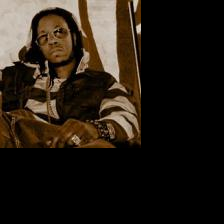

In [242]:
im = Image.open('./BodyCropData/2 chainz139.jpg')
x, y = im.size
if x > 224 or y > 224:
    im.thumbnail((224,224), Image.ANTIALIAS)
background = Image.new('RGB', (224, 224), 'black')
background.paste(im, (0, 0))
background

In [225]:
from PIL import Image

def make_square(im, min_size=224, fill_color=(255, 255, 255, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGB', (size, size), fill_color)
    new_im.paste(im)
    return new_im

In [126]:
with open('names.txt', 'r') as f:
    names = f.readlines()

names = [x.rstrip() for x in names]

In [127]:
len(names)

1366

In [86]:
import cv2
import dlib

In [278]:
body = [x for x in os.listdir('./BodyCropFinal')]

In [304]:
face = [x for x in os.listdir('./FaceCropFinal')]

In [305]:
faceNot = list(set(body) - set(face))

In [307]:
len(faceNot)

0

In [282]:
faceNot[0]

'big sean333.jpg'

In [167]:
len(train2) + len(test2)

278346

In [300]:
save_obj(faceNot, 'faceNot')

In [274]:
test2 = load_obj('test2')

In [277]:
len(list(set(body) - set(train2 + test2)))

0

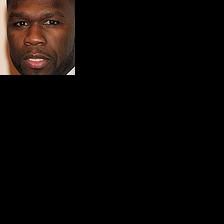

In [302]:
Image.open('./FaceCropFinal/50 cent4.jpg')

In [189]:
img = np.array(Image.open('./FilteredFlickr/tom brady/' + faceNot[2]))
detector = dlib.get_frontal_face_detector()
dets = detector(img, 1)
print(dets)

top, bottom, left, right = dets[0].top(), dets[0].bottom(), dets[0].left(), dets[0].right()
if top < 0:
    top = 0
if bottom < 0:
    bottom = 0
if left < 0:
    left = 0
if right < 0:
    right = 0

rectangles[]


IndexError: 

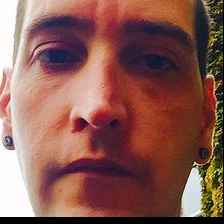

In [166]:
im = Image.fromarray(img[top:bottom,left:right], 'RGB')
x, y = im.size
if x > 224 or y > 224:
    im.thumbnail((224,224), Image.ANTIALIAS)
background = Image.new('RGB', (224, 224), 'black')
background.paste(im, (0, 0))
background

In [204]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5)            

    return faces

def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

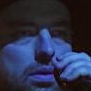

In [243]:
#load another image 
img = cv2.imread('BodyCropData/'+faceNot[7])   
 
#just making a copy of image passed, so that passed image is not changed 
img_copy = img.copy()          

#convert the test image to gray image as opencv face detector expects gray images
gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5) 

left, right, top, bottom = faces[0][0], faces[0][0] + faces[0][2], faces[0][1], faces[0][1] + faces[0][3]
im = Image.fromarray(img[top:bottom,left:right], 'RGB')
im

In [291]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('/home/lumpsum/opencv/data/haarcascades/haarcascade_frontalface_alt.xml')

In [303]:
for img in tqdm(faceNot):    
    im = np.array(Image.open('./BodyCropFinal/'+img))

    im = Image.fromarray(im, 'RGB')
    x, y = im.size
    if x > 224 or y > 224:
        im.thumbnail((224,224), Image.ANTIALIAS)
    background = Image.new('RGB', (224, 224), 'black')
    background.paste(im, (0, 0))
    background.save('./FaceCropFinal/'+img, 'JPEG')

100%|██████████| 176/176 [00:16<00:00, 10.37it/s]


### Reshape labels

In [2]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [5]:
labels = load_obj('./Pickles/labels')

In [10]:
keys = labels.keys()
celebs = healthyData.index.tolist()

In [79]:
pics = {}

for x in celebs:
    pics[x] = []

In [80]:
import string

for key, value in tqdm(pics.items()):
    for p in keys:
        e = p.replace('.jpg', '')
        e = e.rstrip(string.digits)
        if key == e:
            pics[key].append(p)

100%|██████████| 1366/1366 [03:58<00:00,  5.73it/s]


In [81]:
for key, value in pics.items():
    sort = []
    for x in pics[key]:
        sort.append(int(x.replace(key, '').replace('.jpg', '')))
    pics[key] = [str(key) + str(x) + '.jpg' for x in sorted(sort)[:5]]

In [82]:
save_obj(list(pics.values()), 'fivePics')

In [73]:
for x in healthyData.index.tolist():
    os.makedirs("./Application/static/" + x.replace(' ', ''))

In [12]:
labels2 = {}
for x in ids:
    labels2[x] = labels[x]

In [20]:
train2 = [x for x in train if x in ids]
test2 = [x for x in test if x in ids]

In [22]:
len(train2) + len(test2)

278346

In [61]:
cat = load_obj('labelsCat2')
real = load_obj('labelsReal2')

In [62]:
labelsReal = {}
labelsCat = {}

In [63]:
for x in ids:
    labelsReal[x] = real[x]
    labelsCat[x] = cat[x]

In [24]:
for key, value in labels2.items():
    labelsReal[key] = value[0:3]
    labelsCat[key] = value[3:]

In [66]:
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [65]:
save_obj(labelsReal, 'labelsReal3')
save_obj(labelsCat, 'labelsCat3')

In [28]:
save_obj(labels2, 'labels2')

In [75]:
save_obj(train2, 'train2')
save_obj(test2, 'test2')

In [76]:
train2 = load_obj('train2')
test2 = load_obj('test2')
cat3 = load_obj('labelsCat3')
real3 = load_obj('labelsReal3')

In [83]:
batchSize = 128
partition = {}
partition['train'] = load_obj('train2')
partition['test'] = load_obj('test2')
len(partition['train'])/batchSize

1739.40625

In [66]:
build = []
eye = []
hair = []
race = []

for key in train2:
    classes = labelsCat[key]
    build.append(classes[:4])
    eye.append(classes[4:10])
    hair.append(classes[10:16])
    race.append(classes[16:])

In [37]:
print(len(race))

222644


In [30]:
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter

In [67]:
build2 = []
for x in build:
    build2 += [y for y,i in enumerate(x) if i == 1.0]
    
eye2 = []
for x in eye:
    eye2 += [y for y,i in enumerate(x) if i == 1.0]
    
hair2 = []
for x in hair:
    hair2 += [y for y,i in enumerate(x) if i == 1.0]
    
race2 = []
for x in race:
    race2 += [y for y,i in enumerate(x) if i == 1.0]

In [68]:
print(len(build2), len(eye2), len(hair2), len(race2))

222644 222644 222644 222644


In [69]:
compute_class_weight('balanced', classes=np.array([0, 1, 2, 3]), y=build2)

array([ 0.73571164,  1.5550806 , 22.56222132,  0.51192885])

In [70]:
compute_class_weight('balanced', classes=np.array([0, 1, 2, 3, 4, 5]), y=eye2)

array([ 5.1338314 ,  0.57062746,  0.41682393, 14.31610082,  1.03796737,
        1.61189059])

In [71]:
compute_class_weight('balanced', classes=np.array([0, 1, 2, 3, 4, 5]), y=hair2)

array([24.60698497,  0.91913537,  0.66172109,  0.32181615, 15.59131653,
        5.30029043])

In [72]:
compute_class_weight('balanced', classes=np.array([0, 1, 2, 3, 4]), y=race2)

array([9.57402709, 2.27850381, 3.6433317 , 1.53009415, 0.28339549])

## Stats

In [3]:
labels = load_obj('labels')

In [8]:
data2 = [x for x in os.listdir('./Data2')]

In [11]:
for key, value in tqdm(labels.items()):
    if key not in data2:
        print(key)

100%|██████████| 282831/282831 [07:59<00:00, 589.57it/s]


In [13]:
amount = []

for x in tqdm(os.listdir('./Flickr/')):
    for y in os.listdir('./Flickr/'+x+'/'):
        amount.append(y)

100%|██████████| 1847/1847 [00:36<00:00, 51.01it/s] 


In [14]:
len(amount)

799715

In [38]:
i = 0
for x in os.listdir('./FilteredFlickr/'):
    i += len([x for x in os.listdir('./FilteredFlickr/' + x + '/')])
    
i

324191

In [42]:
i = 0
i += len([x for x in os.listdir('./BodyCropFinal/')])
i

278346

In [117]:
test= load_obj('./Pickles/labelsCat')

In [120]:
len(test['amy smart324.jpg'])

25

In [6]:
scores = load_obj('scores')
scores2 = load_obj('scores2')
scores3 = load_obj('scores3')
scores4 = load_obj('./Pickles/scores')
scoresTest = load_obj('scoresTest')
scoresFirst = load_obj('scoresFirst')

In [7]:
scoresFinal = {**scores2, **scores3}
scoresFinal = {**scoresFinal, **scores4}
scoresFinal = {**scoresFinal, **scoresTest}
scoresFinal = {**scoresFinal, **scoresFirst}
scoresFinal = {**scoresFinal, **scores}

In [8]:
first = sorted([key for key in scoresFinal.keys() if key.endswith('1') and 'Body' not in key]) + sorted([key for key in scoresFinal.keys() if key.endswith('2') and 'Body' not in key])
second = sorted([key for key in scoresFinal.keys() if not key.endswith('2') and 'Body' in key and 'Face' not in key]) + sorted([key for key in scoresFinal.keys() if key.endswith('2') and 'Body' in key and 'Face' not in key])
third = sorted([key for key in scoresFinal.keys() if key.endswith('e') and 'Face' in key]) + sorted([key for key in scoresFinal.keys() if key.endswith('2') and 'Face' in key]) + sorted([key for key in scoresFinal.keys() if key.endswith('3') and 'Face' in key]) + sorted([key for key in scoresFinal.keys() if key.endswith('4') and 'Face' in key])

In [18]:
adam1 = sorted([key for key in scoresFinal.keys() if key.endswith('3') and 'Body' not in key])
adam2 = sorted([key for key in scoresFinal.keys() if key.endswith('4') and 'Body' not in key])
adam3 = sorted([key for key in scoresFinal.keys() if key.endswith('5') and 'Body' not in key])

In [9]:
del third[31]
del third[-1]
len(third)

40

In [19]:
del adam3[1]
del adam3[2]
del adam3[3]
del adam3[4]
del adam3[5]
del adam3[6]
del adam3[7]
del adam3[8]

In [47]:
map1 = [scoresFinal[x]['map'] for x in first]
map2 = [scoresFinal[x]['map'] for x in second]
map3 = [scoresFinal[x]['map'] for x in third]

In [31]:
import matplotlib.pyplot as plt
from pylab import *
import seaborn

def plot(cat):
    
    map1 = [scoresFinal[x][cat] for x in first]
    map2 = [scoresFinal[x][cat] for x in second]
    map3 = [scoresFinal[x][cat] for x in third]

    plt.figure(figsize=(20, 10))

    t = arange(0.0, 40.0, 1)
    plt.plot(t, map1, color="red")

    t2 = arange(0.0, 40.0, 1)
    plt.plot(t2, map2, color="blue")

    t3 = arange(0.0, 40.0, 1)
    plt.plot(t3, map3, color="green")

    plt.xlabel('Epoch', size=16)
    plt.xticks(arange(0.0, 40.0, 1))
    if cat == 'map':
        plt.ylabel('MAP overall', size=16)
    else:
        plt.ylabel('MAP ' + cat, size=16)
    plt.title('Value per epoch', size=24)
    plt.grid(True)

    plt.legend(['Model 1', 'Model 2', 'Model 3'], prop={'size': 16})
    
    plt.ylim(ymin=0.0, ymax=0.47)

    savefig(cat + '.png', bbox_inches='tight')
    
    total = map1+map2+map3
    print(min(total), max(total))
    
    plt.show()

0.24711348770654762 0.39314979305418957


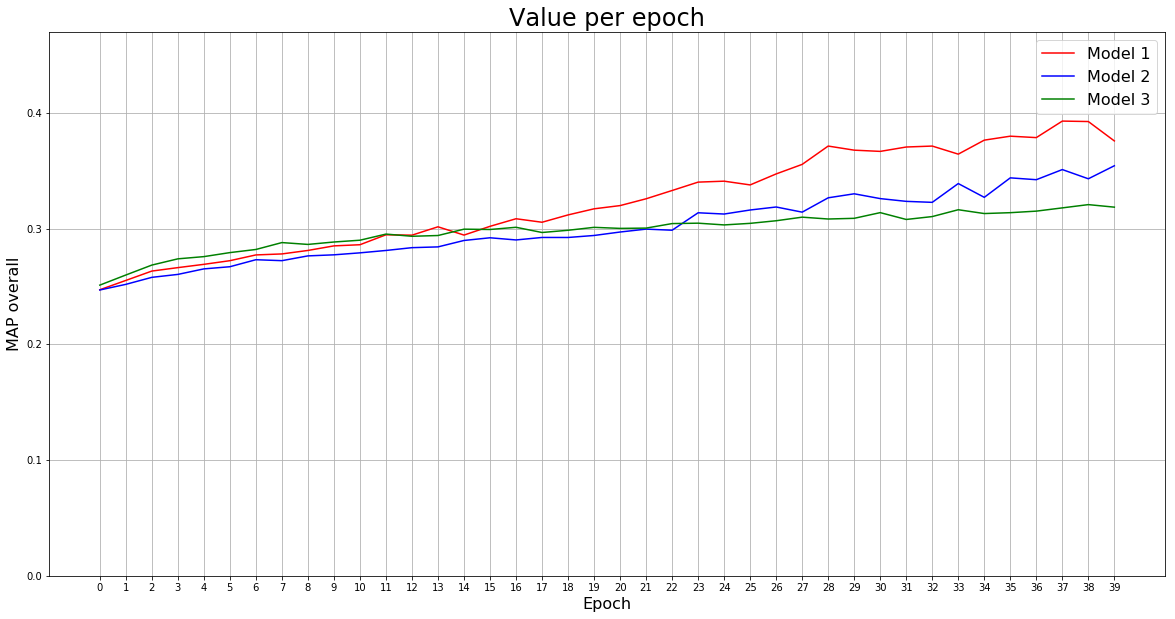

0.32225922286320463 0.4646519900048617


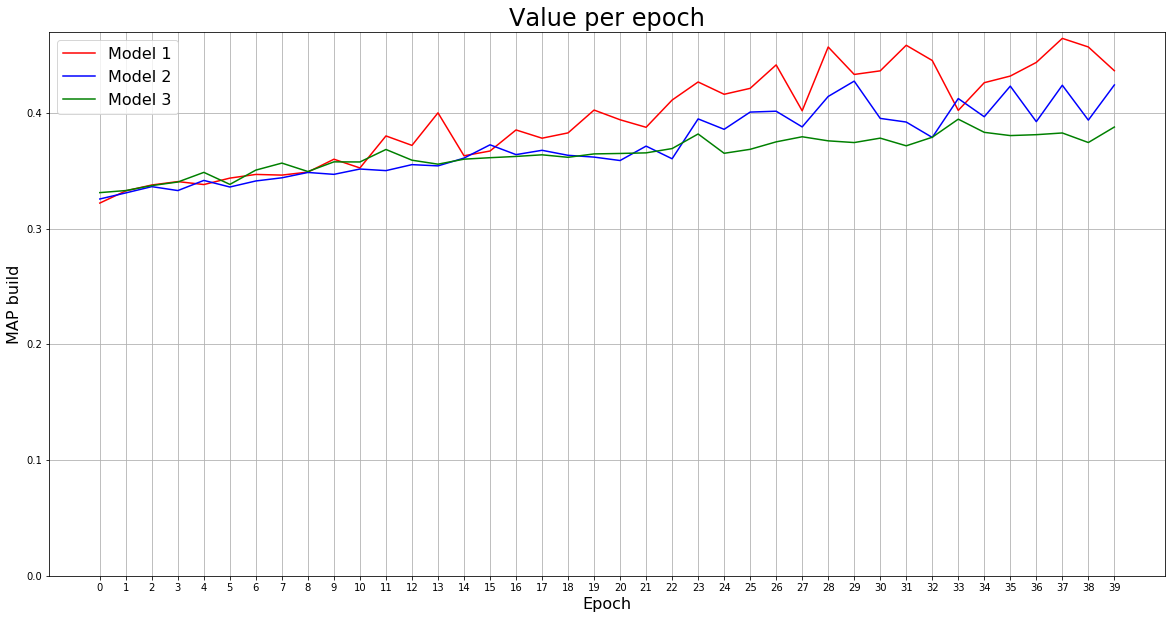

0.19382068584701032 0.3459788590417101


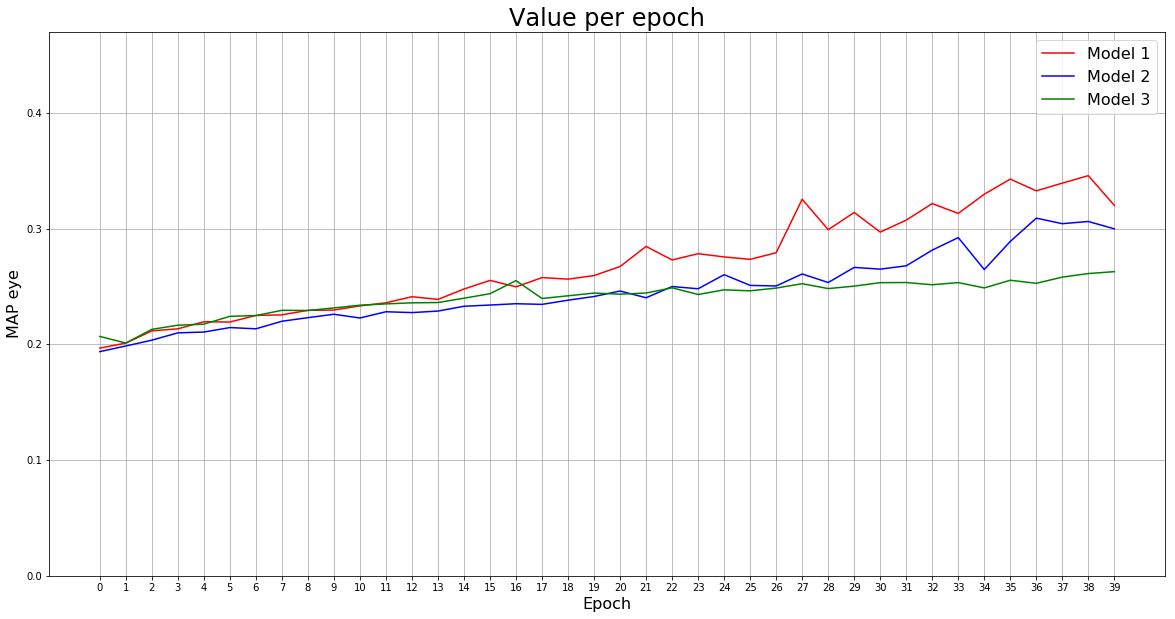

0.21450263137657086 0.3546178360689529


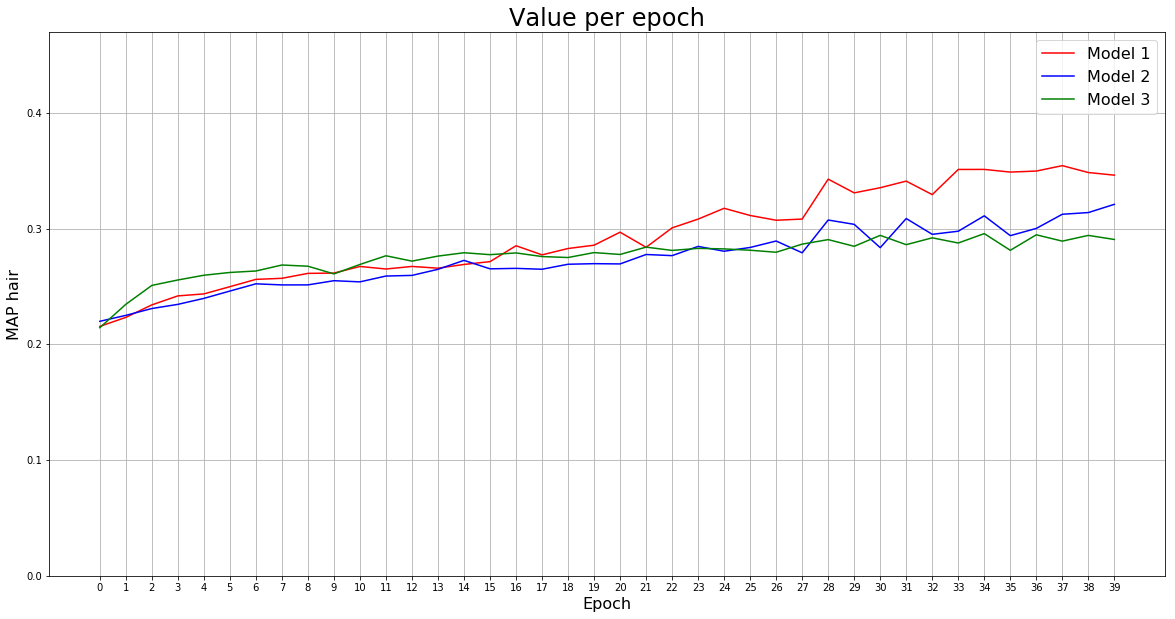

0.24880379946474243 0.4191632978442847


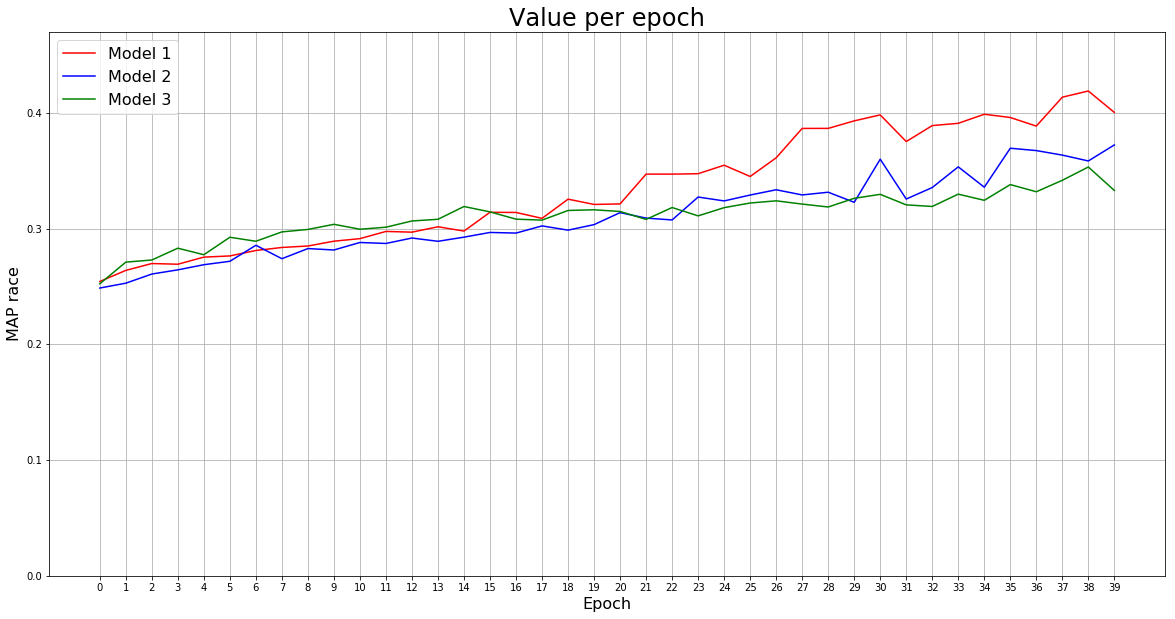

In [32]:
plot('map')
plot('build')
plot('eye')
plot('hair')
plot('race')

In [14]:
import csv

In [15]:
one = []
two = []
three = []

for x in os.listdir('./'):
    if x.endswith('.csv'):
        if 'VGG' in x:
            one.append(x)
        if 'Body' in x and 'Face' not in x:
            two.append(x)
        if 'Face' in x:
            three.append(x)

one, two, three = sorted(one), sorted(two), sorted(three)

In [16]:
realOne = []
realTwo = []
realThree = []

for x in one:
    with open(x, 'r') as csvfile:
        spamreader = csv.DictReader(csvfile)
        for row in spamreader:
            realOne.append(float(row['Value']))
            
for x in two:
    with open(x, 'r') as csvfile:
        spamreader = csv.DictReader(csvfile)
        for row in spamreader:
            realTwo.append(float(row['Value']))
            
for x in three:
    with open(x, 'r') as csvfile:
        spamreader = csv.DictReader(csvfile)
        for row in spamreader:
            realThree.append(float(row['Value']))

del realThree[-1]

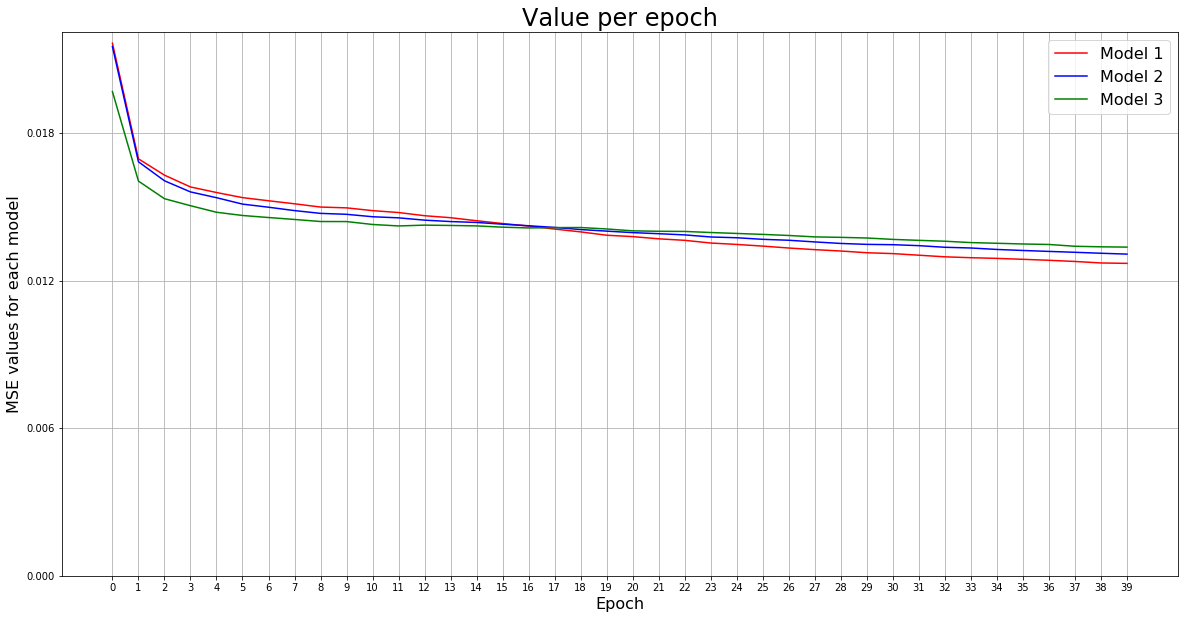

In [28]:
plt.figure(figsize=(20, 10))

t = arange(0.0, 40.0, 1)
plt.plot(t, realOne, color="red")

t2 = arange(0.0, 40.0, 1)
plt.plot(t2, realTwo, color="blue")

t3 = arange(0.0, 40.0, 1)
plt.plot(t3, realThree, color="green")

plt.xlabel('Epoch', size=16)
plt.xticks(arange(0.0, 40.0, 1))
plt.ylabel('MSE values for each model', size=16)
plt.title('Value per epoch', size=24)
plt.grid(True)

plt.legend(['Model 1', 'Model 2', 'Model 3'],prop={'size': 16})

plt.yticks(arange(0.0, 0.024, 0.006))

savefig('real.png', bbox_inches='tight')

plt.show()

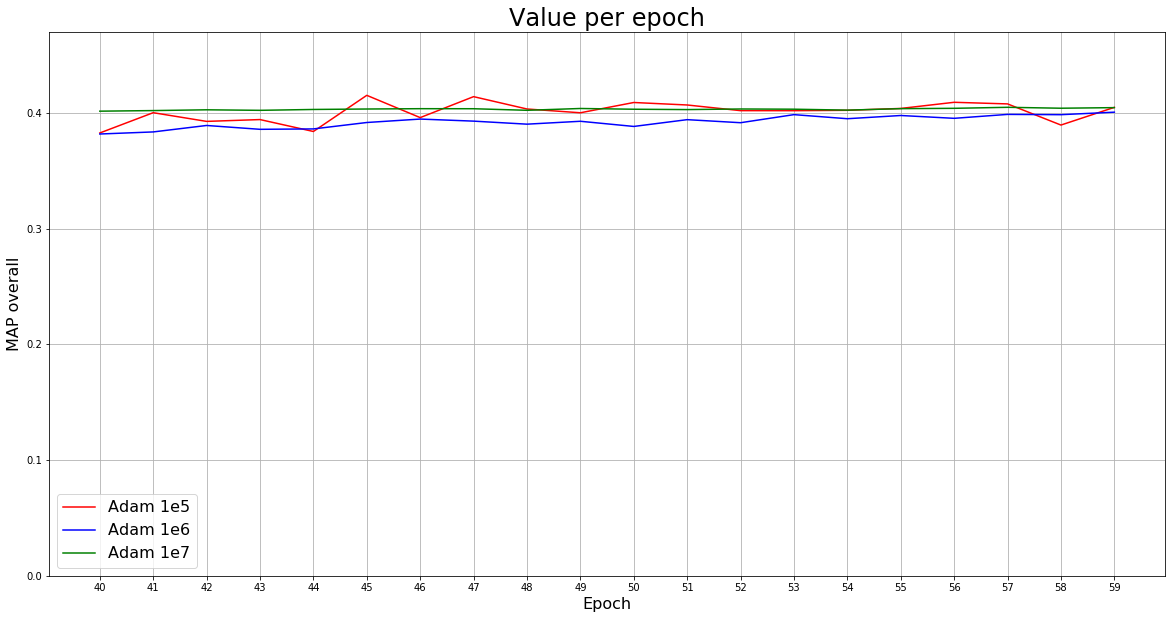

In [29]:
import matplotlib.pyplot as plt
from pylab import *
import seaborn

map1 = [scoresFinal[x]['map'] for x in adam3]
map2 = [scoresFinal[x]['map'] for x in adam1]
map3 = [scoresFinal[x]['map'] for x in adam2]

plt.figure(figsize=(20, 10))

t = arange(40.0, 60.0, 1)
plt.plot(t, map1, color="red")

t2 = arange(40.0, 60.0, 1)
plt.plot(t2, map2, color="blue")

t3 = arange(40.0, 60.0, 1)
plt.plot(t3, map3, color="green")

plt.xlabel('Epoch', size=16)
plt.xticks(arange(40.0, 60.0, 1))
plt.ylabel('MAP overall', size=16)
plt.title('Value per epoch', size=24)
plt.grid(True)

plt.legend(['Adam 1e5', 'Adam 1e6', 'Adam 1e7'],prop={'size': 16})

plt.ylim(ymin=0.0, ymax=0.47)

savefig('adam.png', bbox_inches='tight')

plt.show()

In [199]:
map1 = [scoresFinal[x]['map'] for x in first]
map2 = [scoresFinal[x]['map'] for x in second]
map3 = [scoresFinal[x]['map'] for x in third]

In [208]:
map1 = [scoresFinal[x]['map'] for x in adam3]
map2 = [scoresFinal[x]['map'] for x in adam1]
map3 = [scoresFinal[x]['map'] for x in adam2]

In [209]:
min(map1)

0.3828661830625524

In [213]:
map1.index(max(map1))

5

### Gender

In [32]:
import gender_guesser.detector as gender
from collections import Counter
#from gender_detector import gender_detector as gd

In [6]:
with open('names.txt', 'r') as f:
    names = f.readlines()

names = [x.rstrip() for x in names]

In [7]:
d = gender.Detector()

In [19]:
names[5].split(' ')[0].title()

'Abbey'

In [25]:
d.get_gender(names[3].split(' ')[0].title())

'male'

In [27]:
genderDict = {}

for name in tqdm(names):
    genderDict[name] = d.get_gender(name.split(' ')[0].title())

100%|██████████| 1366/1366 [00:00<00:00, 97210.95it/s]


In [129]:
Counter(genderDict.values())

Counter({'female': 744, 'male': 623})

In [125]:
for key, value in genderDict.items():
    if value == 'unknown':
        print(key)
        first = sorted([x for x in os.listdir('./FilteredFlickr/' + key + '/')])[0]
        im = Image.open('./FilteredFlickr/' + key + '/' + first)
        im.show()
        gender = input("Press Enter to continue...")
        genderDict[key] = gender

jennette mccurdy
Press Enter to continue...female
kiefer sutherland
Press Enter to continue...male
chace crawford
Press Enter to continue...male
soulja boy
Press Enter to continue...male
mirai nagasu
Press Enter to continue...female
perrie edwards
Press Enter to continue...female
gotye
Press Enter to continue...male
mattyb
Press Enter to continue...male
xherdan shaqiri
Press Enter to continue...male
tiger woods
Press Enter to continue...male
macaulay culkin
Press Enter to continue...male
jesy nelson
Press Enter to continue...female
rumer willis
Press Enter to continue...female
klay thompson
Press Enter to continue...male
yunjin kim
Press Enter to continue...female
rydel lynch
Press Enter to continue...female
alek wek
Press Enter to continue...male
taye diggs
Press Enter to continue...male
mckayla maroney
Press Enter to continue...female
thandie newton
Press Enter to continue...female
tinashe
Press Enter to continue...female
china anne mcclain
Press Enter to continue...female
partynextd

In [134]:
genderDict2 = load_obj('genderDict')

In [137]:
Counter(genderDict2.values())

Counter({'female': 744, 'male': 623})

# Thesis

In [4]:
with open('./TextFiles/links2.txt', 'rb') as f:
    data = f.readlines()

In [6]:
len(data)

10243

In [4]:
test = load_obj('./Pickles/test')

In [7]:
from shutil import copy2

In [11]:
for x in tqdm(test):
    copy2('./Data2/' + x, './TestData/'+x)

 19%|█▊        | 10465/56567 [03:54<17:13, 44.60it/s]

KeyboardInterrupt: 

 19%|█▊        | 10465/56567 [04:10<18:21, 41.86it/s]